# Checkpoint 2

## Histogram of contig lengths

In [1]:
# import packages
from Bio import SeqIO
import matplotlib.pyplot as plt

# create list of coverage for each contig
contig_name = []
contig_coverage = []

# extract converage for each contig
for record in SeqIO.parse("contigs.fasta", "fasta"):
    name = record.id.split("_length",1)[0]
    cov = record.id.split("cov_",1)[1]
    contig_name.append(name)
    contig_coverage.append(float(cov))

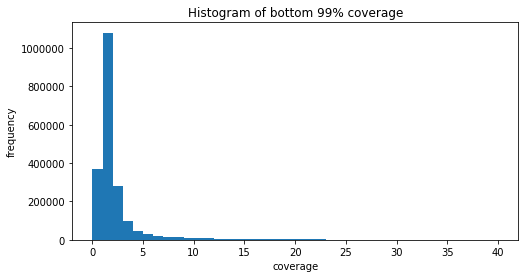

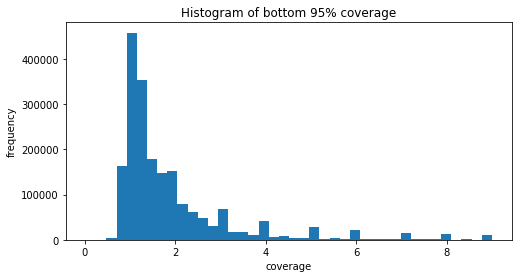

In [ ]:
import numpy as np

# generate a list of percentiles
pthre = [99, 95, 90]
ptile_list = np.percentile(contig_coverage, [99, 95, 90])

# hist of all coverage, 95% bottom coverage, 90% bottom coverage & 75% bottom
for i, ptile in enumerate(ptile_list) :
    plt.figure(figsize=(8,4))
    plt.xlabel('coverage')
    plt.ylabel('frequency')
    plt.title('Histogram of bottom ' + str(pthre[i]) + '% coverage')
    _ = plt.hist([cov for cov in contig_coverage if cov <= ptile], 40, label=range(10))

Digrams above shows the histogram of bottom __99%__, __95%__ and __90%__ of all coverages. Some regions have extremely high coverage so that they "squeeze" other coverages to the very left.As we zoom in at the bottom part, the histogram shows more details. The distribution is not clear, but the histogram is obvious to be multimodal, with __peaks around integers__ 1, 2, 3 and 4. The coverage of each base should always be an integer. Here we plot the average coverage with contigs, so it is not surprising to see the coverages peak at integers.

## MG-RAST Analysis

[link to MG-RAST webpage](https://www.mg-rast.org/mgmain.html?mgpage=overview&metagenome=c7f2346ecd6d676d343832313631362e33)

1. Overall data information

20% of unzipped files (top 45,000,000 lines, 4.57G) including contains 2,041,360 sequences totaling 633,730,179 basepairs with an average length of 310 bps. was analyzed by MG-RAST. Of the sequences that passed QC, 2,414 sequences (0%) contain ribosomal RNA genes, 589,935 sequences (38.72%) contain predicted proteins with known functions, and 931,327 sequences (61.12%) contain predicted proteins with unknown function.

2. Taxonomic analysis

In the current soil sample, the top 5 taxonomic abundances at the genus level are:Ktedonobacter - 24,037 (11.22%), Candidatus Solibacter - 19,645 (9.17%), Candidatus Koribacter - 13,774 (6.43%), unclassified (derived from Bacteria) - 7,826 (3.65%), Acidobacterium - 7,592 (3.54%).Compared our samlple with the other group's sample from same layer, we found out similar results in terms of taxonomic abundances at the genus level.

A comparison of the bacterial community at the phylum level was further studied along the different soil depth. The five dominant bacterial groups were proteobacteria(27.03% in layer1, 27.41% in layer2, 28.34% in layer 3, 27.77% in layer4,32.23% in layer5, 26.98% in layer6), chloroflexi(21.18% in layer1,23.24% in layer2, 12.11% in layer3,9.62% in layer4,4.84% in layer5(rank6, rank4 in this layer is ascomycota, 5.66%),6.43% in layer6), acidobacteria(15.43% in layer1,18.45% in layer2, 19.07% in layer3,16.83% in layer4,9.64% in layer5, 17.51% in layer6), actinobacteria(14.22% in layer1,9.59. in layer2,9.36% in layer3,10.55% in layer4, 21.49% in layer5,8.79% in layer6), firmicutes(4.79% in layer1, 4.19% in layer2, 7.35% in layer3,8.46% in layer 4, 5.26% in layer5,9.26% in layer6). 

Soil microbial community demonstrates the similar structure/abundance at different soil depths. However, the relative abundance of these 5 microbial is a bit off at different layers. Specifically, the abundance of chroloflexi in layer5 is out of top5. As soil depth increases, chloroflexi becomes less abundant. A roughly monotonically increasing trend of the abundance of firmicutes against soil depth was observed. Notably, layer 5 shows abnormally high abundance of actinobacteria, and relatively low abundance of acidobacteria.


## Comparing results from MG-RAST and One Codex

There is __discrepancy__ between One Codex MG-RAST analysis. The discrepancy is reflected in the ranking of abundance in the level genus and phylum, etc. Here we take a close look at the differences:

In genus level, MG-RAST reveals the most abundant genus to be ___Ktedonobacter___, which morphologically resembles the common soil bacteria _Actinobacter_. The type species of the genus, _K. racemifer_, which is also the type species of class Ktedonobacteria, represents one of the deep phylogenic branchs within the phylum __Chloroflexi__, amongst all other uncultivated ones. _Ktedonobacter_ are Gram-positive, filamentous, non-motile heterotrophs which has a huge 13.7 Mbp genome (the __largest__ in 2011, still one of the largest now).  Transposon-related genes over-represented in _K. racemifer_ genome, which explains the huge genome. It takes up __11.22%__ of all hits from MG-RAST. However, _Ktedonobacter_ only  covers __0.66%__ of all readcounts in One Codex and ranks the __2nd__. A large portion of One Codex readcounts hit only higher taxa like phylums but not genus. This might explain the discrepancy and low coverage of _Ktedonobacter_.

The most dominant genus in One Codex analysis is ___Streptomyces___, which is not surprising. _Streptomyces_ are common soil bacteria, and is the largest genus of Actinobacteria. _Streptomyces_ are featured for their distinct "earthy" odor. _Streptomyces_ only ranks the __6th__ in MG-RAST. The __2nd__ and __3rd__ most abundant genus in MG-RAST are ___Solibacter___ and ___Koribacter___, which are 2 Candidatus genus under phylum Acidobacteria. Acidobacteria is a phylum established in 2012. We do not know much about them yet, since they are under-represented in culture. But they are ubiquitous and of significant diversity in soils. ___Bradyrhizobium___ and ___Pseudomonas___ comes the __3rd__ and __4th__ in One Codex, which the former one performs nitrogen fixation and the latter one is known to be almost everywhere.

### Genus Level

![genus level](./pics/genus.png)

Lets takes a look at a higher phylum level. __Proteobacteria__, __Acidobacteria__ and __Chloroflexi__ are the three most abundant phyla in MG-RAST analysis. Proteobacteria do not has representative genus mentioned above, but include various nitrogen fixation bacteria. _Solibacter_ and _Koribacter_ mentioned above are all representives of Acidobacteria. The most abundant _Ktedonobacter_ genus belongs to Chloroflexi.

These three phyla ranks the __2nd__, __4th__ and __6th__ in One Codex analysis. __Actinobacteria__ is the biggest phylum here, which is again not surprising. The candidatus __Rokubacteria__ is a noteworthy phylum which is claimed in 2017 and comes __3rd__ in One Codex analysis. It represents a versatile and deep branch which lacks cultured representatives. Research has shown Rokubacteria are ubiquitous in diverse terrestrial ecosystems around the world.

### Phylum Level

![phylum level](./pics/phylum.png)

In summary, there is significant discrepancy between the results from MG-RAST and One Codex. The details are not clear, but it is most likely that the two sites use different reference genome databases and different coverage algorithms as well. It is not surprising to see common taxa like __proteobacteria__, __Actinobacteria__ (_Streptomyces_) and __Firmicutes__ in the sample. However, we have also noticed traditionally uncultured taxa like __Acidobacteria__ (_Solibacter_ and _Koribacter_) and __Rokubacteria__. Further analysis through taxa are limited since there is no direct association between higher taxa (phylum) and metabolic pathways, and some lower taxa (genus) are uncultured, thus their phenotypes are rather unknown.

> Becraft ED, Woyke T, Jarett J, Ivanova N, Godoy-Vitorino F, Poulton N, Brown JM, Brown J, Lau MCY, Onstott T, Eisen JA, Moser D, Stepanauskas R. Rokubacteria: Genomic Giants among the Uncultured Bacterial Phyla. Front Microbiol. 2017 Nov 28;8:2264. doi: 10.3389/fmicb.2017.02264. eCollection 2017. PubMed PMID: 29234309; PubMed Central PMCID: PMC5712423.

> Chang YJ, Land M, Hauser L, Chertkov O, Del Rio TG, Nolan M, Copeland A, Tice H, Cheng JF, Lucas S, Han C, Goodwin L, Pitluck S, Ivanova N, Ovchinikova G, Pati A, Chen A, Palaniappan K, Mavromatis K, Liolios K, Brettin T, Fiebig A, Rohde M, Abt B, Göker M, Detter JC, Woyke T, Bristow J, Eisen JA, Markowitz V, Hugenholtz P, Kyrpides NC, Klenk HP, Lapidus A. Non-contiguous finished genome sequence and contextual data of the filamentous soil bacterium Ktedonobacter racemifer type strain (SOSP1-21). Stand Genomic Sci. 2011 Oct 15;5(1):97-111. doi: 10.4056/sigs.2114901. Epub 2011 Oct 1. PubMed PMID: 22180814; PubMed Central PMCID: PMC3236041.